In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, PowerTransformer, QuantileTransformer, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly.express as px
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# <center>ДЗ № 5. Linear Regression</center>

### Содержание

1. [Первичный анализ данных](#1)  
2. [Добавление новых признаков](#2)
3. [Графический анализ данных](#3)
4. [Масштабирование признаков](#4)
5. [Разделение датасета на тренировочную и тестовую части](#5)
6. [Кросс-валидация](#6)
7. [Тренировка и оценка результатов стандартных моделей](#7)
8. [Тренировка и оценка результатов моделей с подбором гиперпараметров](#8)

<a name="1"><h2><center>Первичный анализ данных</center></h2></a>

In [2]:
df1 = pd.read_csv('winequality-red.csv', delimiter=';')
df1.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [3]:
print(df1.shape)
print(df1.info())

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


_Пропусков нет, категориальных фичей тоже_

In [4]:
df2 = pd.read_csv('winequality-white.csv', delimiter=';')
df1.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [5]:
print(df2.shape)
print(df2.info())

(4898, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


_Пропусков нет, категориальных фичей тоже_

In [6]:
df = pd.concat([df1, df2], ignore_index=True)
# df = df1
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [7]:
print(df.shape)
print(df.info())

(6497, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB
None


- fixed acidity (фиксированная кислотность): количество кислоты, связанной с вином (в г/л)
- volatile acidity (летучая кислотность): количество уксусной кислоты в вине (в г/л)
- citric acid (лимонная кислота): количество лимонной кислоты в вине (в г/л)
- residual sugar (остаточный сахар): количество остаточного сахара после остановки брожения (в г/л)
- chlorides (хлориды): количество соли в вине (в г/л)
- free sulfur dioxide (свободный диоксид серы): количество свободного диоксида серы (SO2), который доступен для связывания с другими химическими соединениями (в мг/л)
- total sulfur dioxide (общий диоксид серы): количество свободного и связанного диоксида серы (в мг/л)
- density (плотность): плотность вина (в г/см^3)
- pH: щелочность вина (от 0 до 14)
- sulphates (сульфаты): количество сульфатов в вине (в г/л)
- alcohol (алкоголь): процентное содержание алкоголя в вине
- quality (качество): оценка качества вина по шкале от 0 до 10, где 0 - самое плохое, а 10 - самое лучшее.

<a name="2"><h2><center>Добавление новых признаков</center></h2></a>

Можно добавить следующие новые признаки на основе данных:

- Общая кислотность (total acidity) - сумма фиксированной кислотности, летучей кислотности и лимонной кислоты.
- Сахаристость (sweetness) - соотношение между остаточным сахаром и общей кислотностью.
- Индекс окисления (oxidation index) - отношение количества свободного диоксида серы к общей кислотности.
- Соотношение диоксида серы (sulfur dioxide ratio) - отношение количества свободного диоксида серы к общему количеству диоксида серы.
- Соотношение окислителей и антиоксидантов (oxidant-antioxidant ratio) - отношение количества диоксида серы к содержанию сульфатов и сульфитов.
- Кислотность в сочетании с содержанием алкоголя (acidity-alcohol ratio) - отношение общей кислотности к содержанию алкоголя.
- Разница между фиксированной и летучей кислотностью (fixed-volatile acidity difference).
- Содержание минералов (mineral content) - отношение суммарного количества солей к общей кислотности.

In [8]:
df['total acidity'] = df[['fixed acidity', 'volatile acidity', 'citric acid']].sum(axis=1)
df['sweetness'] = df['residual sugar'] / df['total acidity']
df['oxidation index'] = df['free sulfur dioxide'] / df['total acidity']
df['sulfur dioxide ratio'] = df['free sulfur dioxide'] / df['total sulfur dioxide']
df['oxidant-antioxidant ratio'] = df['total sulfur dioxide'] / df['sulphates']
df['acidity-alcohol ratio'] = df['total sulfur dioxide'] / df['alcohol']
df['mineral content'] = df['chlorides'] / df['total acidity']

quality = df.pop('quality')
df.insert(len(df.columns), 'quality', quality)

In [9]:
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  total acidity  sweetness  oxidation index  sulfur dioxide ratio  \
0      9.4           8.10   0.234568         1.358025              0.323529   
1      9.8           8.68   0.299539         2.880184              0.373134   
2      9.8           8.60   0.267442         1.744186              0.277778   
3      9.8          12.04   0.157807         1.411960              0.283333   
4      9.4           8.10   0.234568         1.358025              0.323529   
5      9.4           8.06   0.223325         1.612903              0.325000   
6      9.4           8.56   0.186916         1.752336              0.254237   
7     10.0           7.95   0.150943         1.886792              0.714286   
8      9.5           8.40   0.238095         1.071429              0.500000   
9     10.5           8.36   0.729665         2.033493              0.166667   

   oxidant-antioxidant ratio  acidity-alcohol ratio  mineral content  quality  
0                  60.714286               3.617021         0.009383        5  
1                  98.529412               6.836735         0.011290        5  
2                  83.076923               5.510204         0.010698        5  
3                 103.448276               6.122449         0.006229        6  
4                  60.714286               3.617021         0.009383        5  
5                  71.428571               4.255319         0.009305        5  
6                 128.260870               6.276596         0.008061        5  
7                  44.680851               2.100000         0.008176        7  
8                  31.578947               1.894737         0.008690        7  
9                 127.500000               9.714286         0.008493        5

In [10]:
print(df.shape)
print(df.info())

(6497, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   fixed acidity              6497 non-null   float64
 1   volatile acidity           6497 non-null   float64
 2   citric acid                6497 non-null   float64
 3   residual sugar             6497 non-null   float64
 4   chlorides                  6497 non-null   float64
 5   free sulfur dioxide        6497 non-null   float64
 6   total sulfur dioxide       6497 non-null   float64
 7   density                    6497 non-null   float64
 8   pH                         6497 non-null   float64
 9   sulphates                  6497 non-null   float64
 10  alcohol                    6497 non-null   float64
 11  total acidity              6497 non-null   float64
 12  sweetness                  6497 non-null   float64
 13  oxidation index            6497 non-n

In [11]:
df.describe().round(2)

fixed acidity  volatile acidity  citric acid  residual sugar  \
count        6497.00           6497.00      6497.00         6497.00   
mean            7.22              0.34         0.32            5.44   
std             1.30              0.16         0.15            4.76   
min             3.80              0.08         0.00            0.60   
25%             6.40              0.23         0.25            1.80   
50%             7.00              0.29         0.31            3.00   
75%             7.70              0.40         0.39            8.10   
max            15.90              1.58         1.66           65.80   

       chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  \
count    6497.00              6497.00               6497.00  6497.00  6497.00   
mean        0.06                30.53                115.74     0.99     3.22   
std         0.04                17.75                 56.52     0.00     0.16   
min         0.01                 1.00                  6.00     0.99     2.72   
25%         0.04                17.00                 77.00     0.99     3.11   
50%         0.05                29.00                118.00     0.99     3.21   
75%         0.06                41.00                156.00     1.00     3.32   
max         0.61               289.00                440.00     1.04     4.01   

       sulphates  alcohol  total acidity  sweetness  oxidation index  \
count    6497.00  6497.00        6497.00    6497.00          6497.00   
mean        0.53    10.49           7.87       0.72             4.07   
std         0.15     1.19           1.39       0.64             2.54   
min         0.22     8.00           4.13       0.06             0.10   
25%         0.43     9.50           7.02       0.22             2.12   
50%         0.51    10.30           7.60       0.38             3.76   
75%         0.60    11.30           8.38       1.09             5.61   
max         2.00    14.90          17.05       7.03            43.72   

       sulfur dioxide ratio  oxidant-antioxidant ratio  acidity-alcohol ratio  \
count               6497.00                    6497.00                6497.00   
mean                   0.29                     239.52                  11.34   
std                    0.12                     131.89                   6.07   
min                    0.02                       8.96                   0.50   
25%                    0.20                     139.68                   6.96   
50%                    0.27                     245.95                  11.05   
75%                    0.35                     334.00                  15.49   
max                    0.86                     831.08                  41.90   

       mineral content  quality  
count          6497.00  6497.00  
mean              0.01     5.82  
std               0.00     0.87  
min               0.00     3.00  
25%               0.01     5.00  
50%               0.01     6.00  
75%               0.01     6.00  
max               0.07     9.00

<a name="3"><h2><center>Графический анализ данных</center></h2></a>

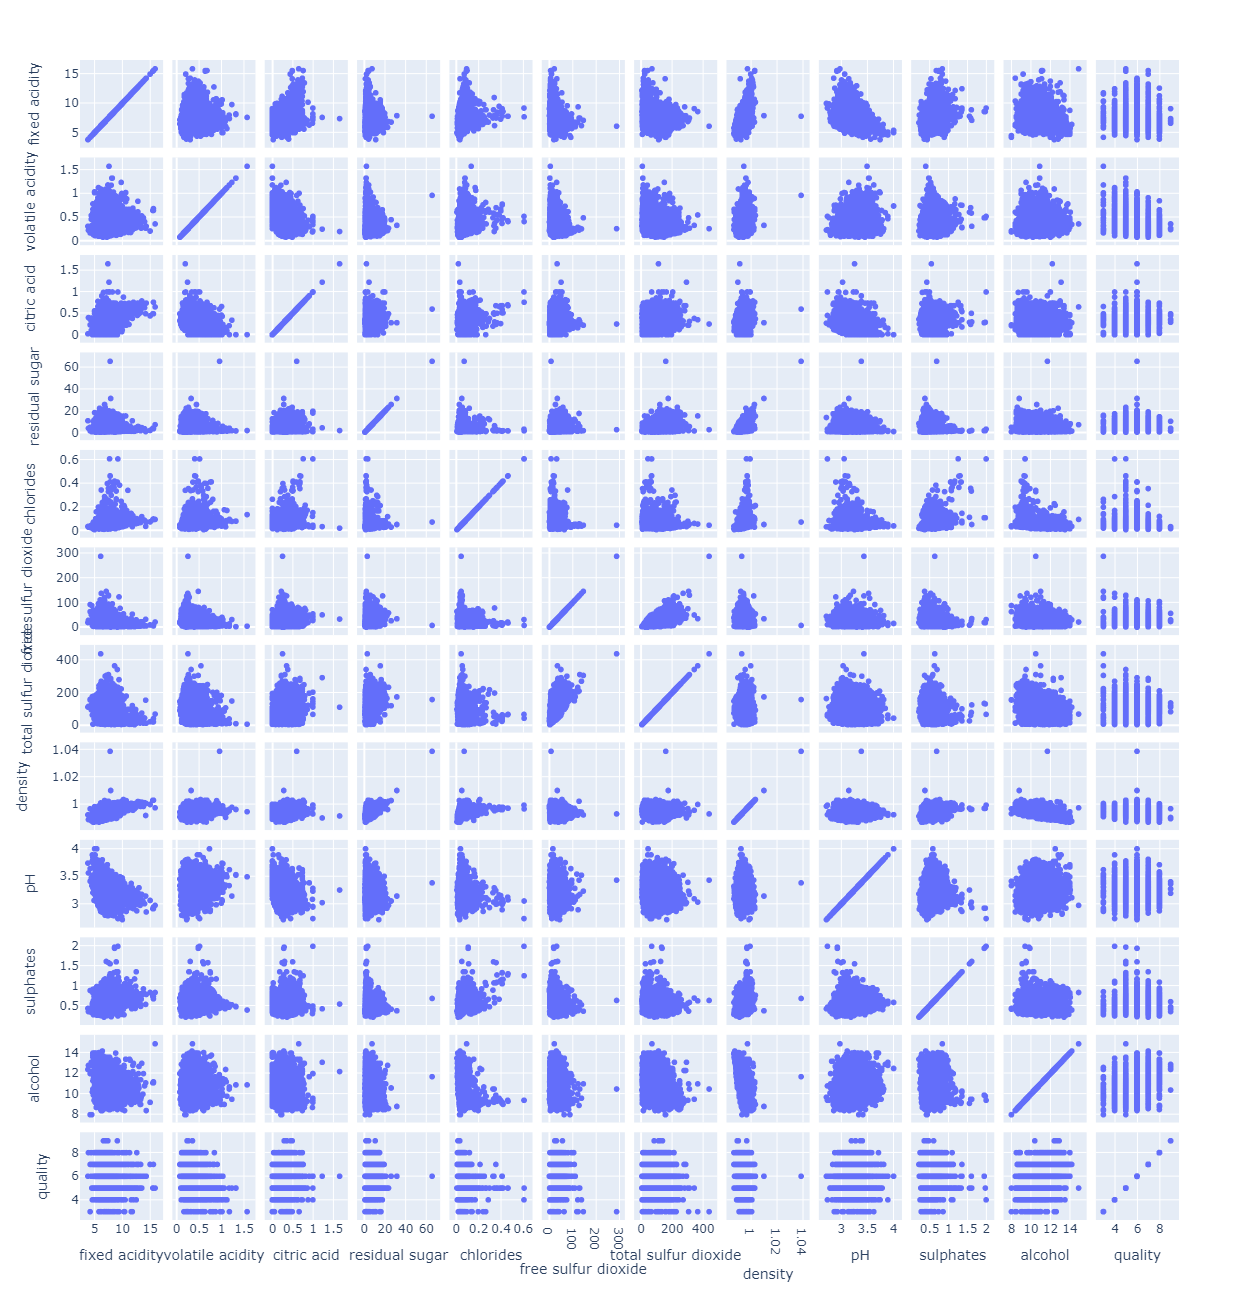

In [12]:
cols_to_keep = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                'density', 'pH', 'sulphates', 'alcohol', 'quality']

df_subset = df[cols_to_keep].dropna()
fig = px.scatter_matrix(df_subset, dimensions=cols_to_keep)
fig.update_layout(width=1300, height=1300)
fig.show()

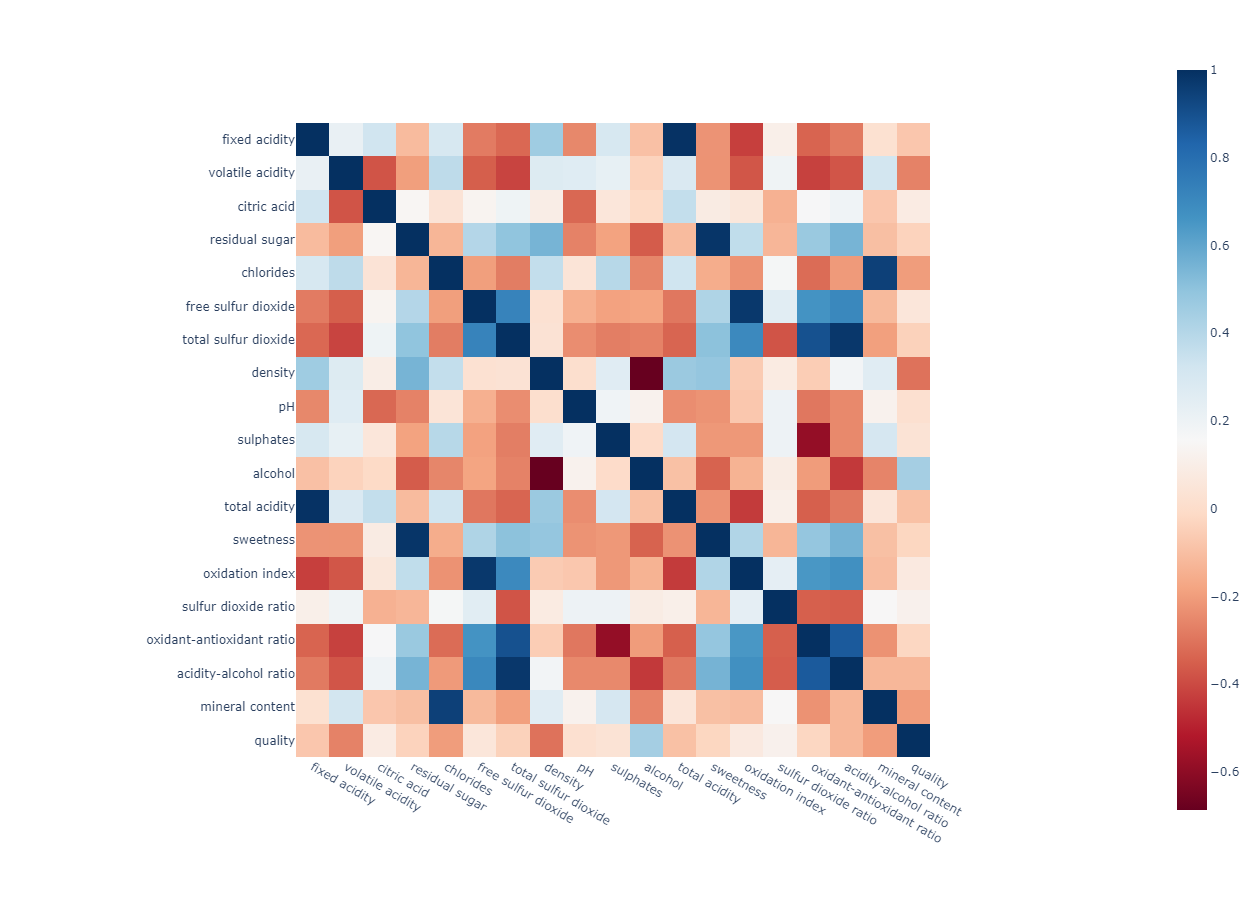

In [13]:
corr_matrix = df.corr()
fig = px.imshow(corr_matrix, color_continuous_scale='RdBu', width=900, height=900)
fig.show()

<a name="4"><h2><center>Масштабирование признаков</center></h2></a>

In [14]:
# scaler = StandardScaler()
# scaler = MinMaxScaler()
# scaler = MaxAbsScaler()
# scaler = RobustScaler()
# scaler = PowerTransformer()
scaler = QuantileTransformer()
#scaler = Normalizer()

scaled_df = scaler.fit_transform(df)

<a name="5"><h2><center>Разделение датасета на тренировочную и тестовую части</center></h2></a>

In [15]:
X = scaled_df[:, :-1]
Y = scaled_df[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=66)
# X_val, X_test, Y_val, Y_test = train_test_split(X, Y, test_size=0.3, random_state=66)

<a name="6"><h2><center>Кросс-валидация</center></h2></a>

In [16]:
model_RidgeCV = RidgeCV()
model_RidgeCV.fit(X_train, Y_train)
Y_pred = model_RidgeCV.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
print("R^2 Cross-Validation Ridge:", r2)

model_LassoCV = LassoCV()
model_LassoCV.fit(X_train, Y_train)
Y_pred = model_LassoCV.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
print("R^2 Cross-Validation Lasso:", r2)

R^2 Cross-Validation Ridge: 0.34747422595340094
R^2 Cross-Validation Lasso: 0.3476828728974367


<a name="7"><h2><center>Тренировка и оценка результатов стандартных моделей</center></h2></a>

In [17]:
model_Linear = LinearRegression()
model_Linear.fit(X_train, Y_train)
Y_pred = model_Linear.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
print("R^2 Linear:", r2)

model_Ridge = Ridge()
model_Ridge.fit(X_train, Y_train)
Y_pred = model_Ridge.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
print("R^2 Ridge:", r2)

model_Lasso = Lasso()
model_Lasso.fit(X_train, Y_train)
Y_pred = model_Lasso.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
print("R^2 Lasso:", r2)

R^2 Linear: 0.3473172626645853
R^2 Ridge: 0.34796942964136335
R^2 Lasso: -9.673352505856769e-05


<a name="8"><h2><center>Тренировка и оценка результатов моделей с подбором гиперпараметров</center></h2></a>

In [25]:
model_Ridge = Ridge(alpha=0.1, solver='sag')
model_Ridge.fit(X_train, Y_train)
Y_pred = model_Ridge.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
print("R^2 Ridge:", r2)

model_Lasso = Lasso(alpha=0.00001, max_iter=10000, selection='random')
model_Lasso.fit(X_train, Y_train)
Y_pred = model_Lasso.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
print("R^2 Lasso:", r2)

R^2 Ridge: 0.3474750744414953
R^2 Lasso: 0.3474697147299892


_Результаты с подбором гиперпараметров не сильно улучшили результат (за исключением метода Lasso). Результаты неплохие для моделей линейной регрессии_